<a href="https://colab.research.google.com/github/Javlonbek-Math/ML-DL_projects/blob/main/Semantic_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Semantic Segmentation**

In [3]:
import fastai
import torch

In [4]:
from fastai.vision.all import *
import numpy as np

In [5]:
path = untar_data(URLs.CAMVID_TINY)

def label_getter(file):
  return path/'labels'/f'{file.stem}_P{file.suffix}'

# Data Loaders
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = label_getter, codes = np.loadtxt(path/'codes.txt', dtype=str))

# fine-tuning
learn = unet_learner(dls, resnet34)
learn.fine_tune(12)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 125MB/s]


epoch,train_loss,valid_loss,time
0,3.017350,2.163578,00:02


epoch,train_loss,valid_loss,time
0,1.688163,1.626976,00:01
1,1.476075,1.289291,00:01
2,1.327694,1.182858,00:01
3,1.211738,1.175803,00:01
4,1.123731,0.991021,00:01
5,1.024336,0.917918,00:01
6,0.935746,0.865599,00:01
7,0.858294,0.844114,00:01
8,0.789697,0.828224,00:01
9,0.730925,0.815663,00:01


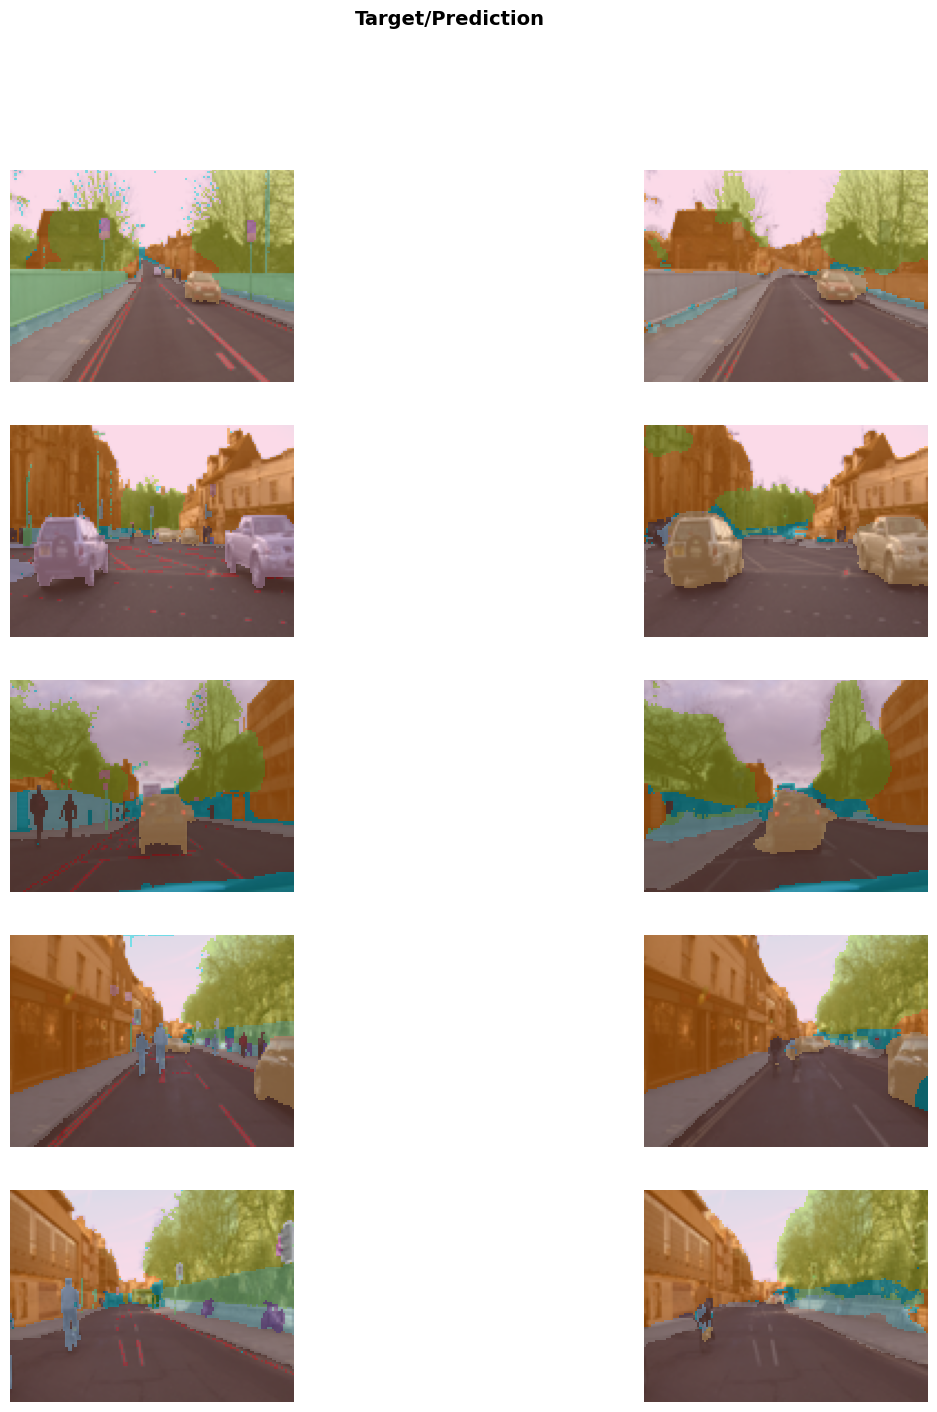

In [6]:
learn.show_results(max_n=5, figsize=(15,16))
